In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [131]:
info = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [132]:
info

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


but, some columns here seem quite useless, like "EmployeeNumber" (perhaps order they were hired? database is unclear) and "EmployeeCount" (all 1s) and "Over18" (all yes) and "StandardHours" (all 80), so they'll just be removed now

In [133]:
#perc =[.20, .40, .60, .80] 
#desc = info.describe(percentiles = perc, include = ['float', 'int']) 
#desc

In [134]:
#import matplotlib.pyplot as plt
#for i in info.columns:
#    plt.figure()
#    plt.hist(info[i])
#    plt.suptitle(i, fontsize=20)


In [135]:
info.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'], inplace=True,axis=1)

now we OHE the categorical variables, including likert scale type variables, word-categorical ones first

In [136]:
columns = info.columns
num_columns = info._get_numeric_data().columns
catlist = list(set(columns)-set(num_columns))

In [137]:
catlist

['OverTime',
 'Gender',
 'Department',
 'JobRole',
 'Attrition',
 'BusinessTravel',
 'EducationField',
 'MaritalStatus']

In [138]:
catlist.remove('Attrition')

In [139]:
tempcat = pd.concat([pd.get_dummies(info[col],col) for col in catlist], axis=1)
print(tempcat.columns)

Index(['OverTime_No', 'OverTime_Yes', 'Gender_Female', 'Gender_Male',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')


In [140]:
tempcat

,OverTime_No,OverTime_Yes,Gender_Female,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,...,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
3,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1466,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1467,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1468,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


and thats the OHE categorical. now lets do the likert scale ones, these ones i'll just manually do because it tells us all of the necessary info already.

In [141]:
liklist = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','JobLevel','StockOptionLevel']
templik = pd.concat([pd.get_dummies(info[col],col) for col in liklist], axis=1)
print(templik.columns)

Index(['Education_1', 'Education_2', 'Education_3', 'Education_4',
       'Education_5', 'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'JobInvolvement_1', 'JobInvolvement_2', 'JobInvolvement_3',
       'JobInvolvement_4', 'JobSatisfaction_1', 'JobSatisfaction_2',
       'JobSatisfaction_3', 'JobSatisfaction_4', 'PerformanceRating_3',
       'PerformanceRating_4', 'RelationshipSatisfaction_1',
       'RelationshipSatisfaction_2', 'RelationshipSatisfaction_3',
       'RelationshipSatisfaction_4', 'WorkLifeBalance_1', 'WorkLifeBalance_2',
       'WorkLifeBalance_3', 'WorkLifeBalance_4', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5', 'StockOptionLevel_0',
       'StockOptionLevel_1', 'StockOptionLevel_2', 'StockOptionLevel_3'],
      dtype='object')


In [142]:
templik

,Education_1,Education_2,Education_3,Education_4,Education_5,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,...,WorkLifeBalance_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1466,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1467,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1468,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


odd, looks like we're missing 1 and 2 for PerformanceRating. But maybe this is not a bug? lets test

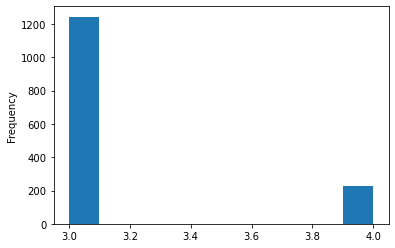

In [143]:
info['PerformanceRating'].plot.hist()

Ok, indeed, it's not a bug. cool, let's keep going. Let's first purge the original columns in liklist and catlist from info dataframe before concatenating them all together.

In [144]:
info.drop(liklist,axis=1,inplace=True)

In [145]:
info.drop(catlist,axis=1,inplace=True)

In [146]:
newinfo = pd.concat([info['Attrition'],tempcat,templik],axis=1)

In [147]:
info.drop('Attrition', axis=1, inplace=True)

In [148]:
info

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,4,17,17,3,5,2,0,3
1466,39,613,6,42,9991,21457,4,15,9,5,7,7,1,7
1467,27,155,4,87,6142,5174,1,20,6,0,6,2,0,3
1468,49,1023,2,63,5390,13243,2,14,17,3,9,6,0,8


In [149]:
info1 = pd.DataFrame(columns=info.columns)
for i in info.columns:
    info1[i] = pd.qcut(info[i], 5, labels=False,duplicates='drop')

In [150]:
info1

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3,3,0,4,3,3,3,0,1,0,2,2,0,3
1,4,0,2,2,2,4,0,4,2,1,3,3,0,3
2,2,4,0,4,0,0,3,2,1,1,0,0,0,0
3,1,4,1,1,1,4,0,0,1,1,3,3,1,0
4,0,1,0,0,1,2,3,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,2,4,0,0,2,2,3,3,1,1,1,0,2
1466,3,1,2,0,4,3,2,2,2,3,2,3,0,3
1467,0,0,1,3,3,0,0,4,1,0,2,1,0,2
1468,4,3,0,2,2,2,1,2,3,1,3,3,0,4


In [151]:
newinfo = pd.concat([info1, newinfo],axis=1)

In [152]:
newinfo

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,WorkLifeBalance_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,3,3,0,4,3,3,3,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,4,0,2,2,2,4,0,4,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,4,0,4,0,0,3,2,1,1,...,0,1,0,0,0,0,1,0,0,0
3,1,4,1,1,1,4,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,2,3,0,1,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,2,4,0,0,2,2,3,3,1,...,0,0,1,0,0,0,0,1,0,0
1466,3,1,2,0,4,3,2,2,2,3,...,0,0,0,1,0,0,0,1,0,0
1467,0,0,1,3,3,0,0,4,1,0,...,0,0,1,0,0,0,0,1,0,0
1468,4,3,0,2,2,2,1,2,3,1,...,0,0,1,0,0,0,1,0,0,0


all thats left before we can start training etc is turning attrition into a 0 or 1 target.

In [153]:
newinfo['Attrition'].replace({"Yes":1,"No":0}, inplace=True)

In [154]:
newinfo

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,WorkLifeBalance_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,3,3,0,4,3,3,3,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,4,0,2,2,2,4,0,4,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,4,0,4,0,0,3,2,1,1,...,0,1,0,0,0,0,1,0,0,0
3,1,4,1,1,1,4,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,2,3,0,1,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,2,4,0,0,2,2,3,3,1,...,0,0,1,0,0,0,0,1,0,0
1466,3,1,2,0,4,3,2,2,2,3,...,0,0,0,1,0,0,0,1,0,0
1467,0,0,1,3,3,0,0,4,1,0,...,0,0,1,0,0,0,0,1,0,0
1468,4,3,0,2,2,2,1,2,3,1,...,0,0,1,0,0,0,1,0,0,0


In [155]:
x = newinfo.drop(['Attrition'],axis=1)

In [156]:
y = newinfo['Attrition']

In [157]:
x

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,WorkLifeBalance_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,3,3,0,4,3,3,3,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,4,0,2,2,2,4,0,4,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,4,0,4,0,0,3,2,1,1,...,0,1,0,0,0,0,1,0,0,0
3,1,4,1,1,1,4,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,2,3,0,1,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,2,4,0,0,2,2,3,3,1,...,0,0,1,0,0,0,0,1,0,0
1466,3,1,2,0,4,3,2,2,2,3,...,0,0,0,1,0,0,0,1,0,0
1467,0,0,1,3,3,0,0,4,1,0,...,0,0,1,0,0,0,0,1,0,0
1468,4,3,0,2,2,2,1,2,3,1,...,0,0,1,0,0,0,1,0,0,0


In [158]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

test train split time

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

20% of data will be kept as metric to evaluate model

so we'll try two models, a logistic regression and a shallow neural net

In [160]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [161]:
y_pred = model.predict(x_test)

In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
score = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       244
           1       0.66      0.50      0.57        50

    accuracy                           0.87       294
   macro avg       0.78      0.72      0.75       294
weighted avg       0.86      0.87      0.86       294



In [163]:
score

0.8707482993197279

In [164]:
y_probpred = model.predict_proba(x_test)

In [165]:
probs = []

In [166]:
for term in y_probpred:
    probs.append(term[1])

In [167]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,probs)

0.8576229508196721

cool, so not too bad. but lets identify the key features.

In [168]:
from sklearn.feature_selection import RFE
selector = RFE(LogisticRegression(), n_features_to_select = 5)

In [169]:
selector = selector.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [170]:
y_predRFE = selector.predict(x_test)

In [171]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [172]:
print("general accuracy" + str(score))
print("precision" + str(precision))
print("recall" + str(recall))


general accuracy0.8707482993197279
precision0.6578947368421053
recall0.5


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       244
           1       0.66      0.50      0.57        50

    accuracy                           0.87       294
   macro avg       0.78      0.72      0.75       294
weighted avg       0.86      0.87      0.86       294



In [174]:
print ('coefficients',selector.estimator_.coef_)

coefficients [[1.45946973 1.04145686 0.97679018 1.00683346 1.61966261]]


In [175]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

In [211]:
x_train.columns[[15,29,47,51,69]]

Index(['OverTime_Yes', 'JobRole_Sales Representative',
       'EnvironmentSatisfaction_1', 'JobInvolvement_1', 'JobLevel_1'],
      dtype='object')

In [176]:
x_train

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,WorkLifeBalance_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
672,3,1,3,2,3,1,3,3,2,3,...,0,0,1,0,0,0,1,0,0,0
960,3,3,0,2,1,0,0,3,2,0,...,0,0,1,0,0,0,0,1,0,0
986,3,4,4,0,3,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
652,2,4,4,0,3,0,0,1,2,0,...,0,0,0,1,0,0,1,0,0,0
366,3,0,1,1,3,1,0,3,1,3,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0,2,0,3,1,3,0,3,2,3,...,0,1,0,0,0,0,0,1,0,0
1358,1,3,3,3,3,3,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1325,3,3,2,3,1,2,2,1,1,1,...,0,1,0,0,0,0,1,0,0,0
1410,3,1,0,4,2,0,1,2,3,2,...,0,0,1,0,0,0,0,1,0,0


In [180]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
nn = keras.Sequential()
nn.add(keras.Input(78))
nn.add(layers.Dense(20, activation="relu"))
nn.add(layers.Dense(20, activation="relu"))
nn.add(layers.Dense(1, activation='sigmoid'))

In [181]:
nn.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [182]:
nn.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Epoch 1/4
37/37 [==============================] - 0s 5ms/step - loss: 0.4425 - accuracy: 0.8367 - val_loss: 0.4135 - val_accuracy: 0.8299
Epoch 2/4
37/37 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8410 - val_loss: 0.4005 - val_accuracy: 0.8299
Epoch 3/4
37/37 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8418 - val_loss: 0.3898 - val_accuracy: 0.8299
Epoch 4/4
37/37 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8427 - val_loss: 0.3772 - val_accuracy: 0.8299


In [183]:
nn.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Epoch 1/4
37/37 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8495 - val_loss: 0.3635 - val_accuracy: 0.8503
Epoch 2/4
37/37 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8639 - val_loss: 0.3498 - val_accuracy: 0.8639
Epoch 3/4
37/37 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8801 - val_loss: 0.3389 - val_accuracy: 0.8673
Epoch 4/4
37/37 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8835 - val_loss: 0.3311 - val_accuracy: 0.8673


In [184]:
nn.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Epoch 1/4
37/37 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.8852 - val_loss: 0.3263 - val_accuracy: 0.8673
Epoch 2/4
37/37 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9056 - val_loss: 0.3195 - val_accuracy: 0.8741
Epoch 3/4
37/37 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9056 - val_loss: 0.3166 - val_accuracy: 0.8776
Epoch 4/4
37/37 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9141 - val_loss: 0.3211 - val_accuracy: 0.8810


In [185]:
predictions = nn.predict(x_test)

In [186]:
predictions = predictions.flatten()

In [187]:
newlist = []
for term in predictions:
    if term > 0.5:
        newlist.append(1)
    else:
        newlist.append(0)


In [188]:
newlist

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [189]:
score = accuracy_score(y_test,newlist)
precision = precision_score(y_test, newlist)
recall = recall_score(y_test, newlist)

In [190]:
print("general accuracy" + str(score))
print("precision" + str(precision))
print("recall" + str(recall))

general accuracy0.8809523809523809
precision0.8260869565217391
recall0.38


In [191]:
print(classification_report(y_test,newlist))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       244
           1       0.83      0.38      0.52        50

    accuracy                           0.88       294
   macro avg       0.86      0.68      0.73       294
weighted avg       0.88      0.88      0.86       294



In [192]:
info2 = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


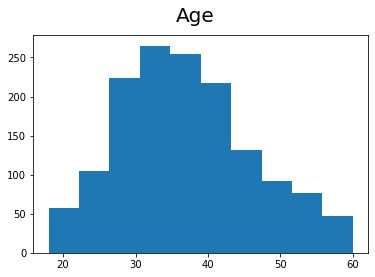

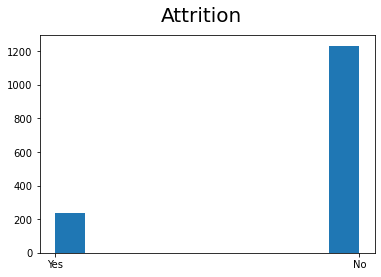

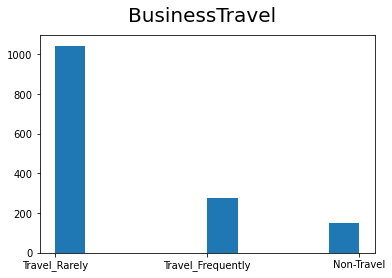

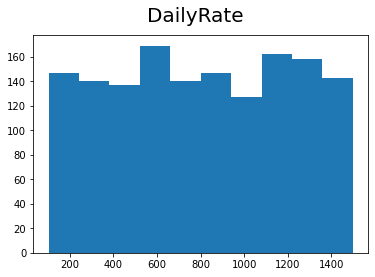

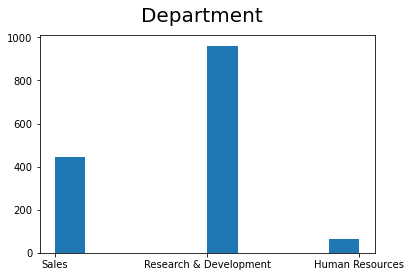

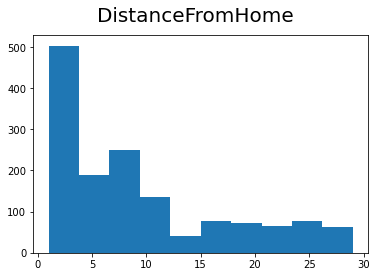

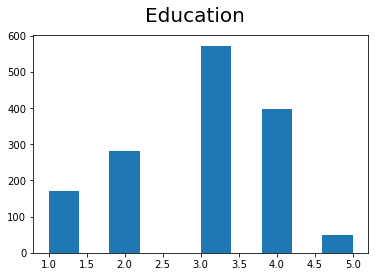

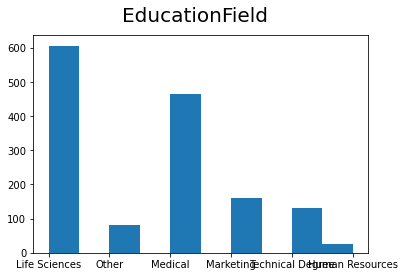

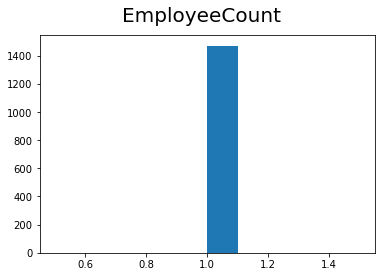

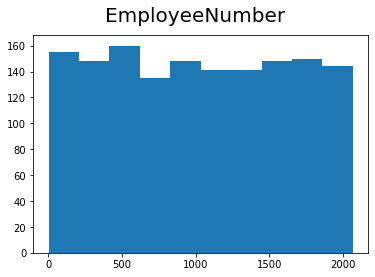

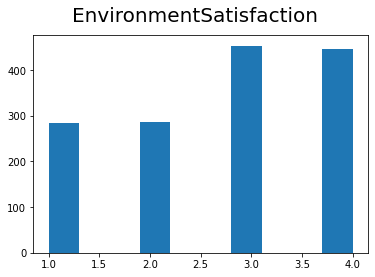

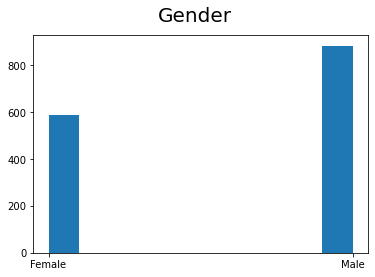

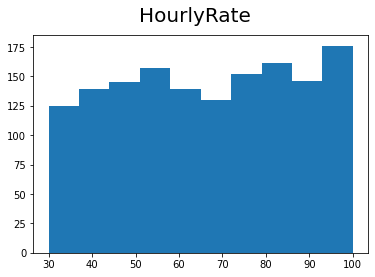

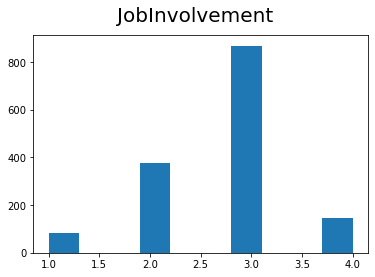

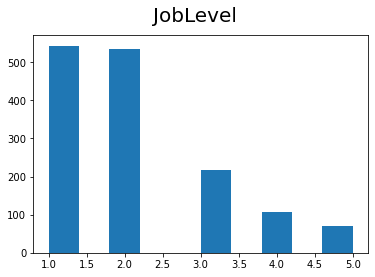

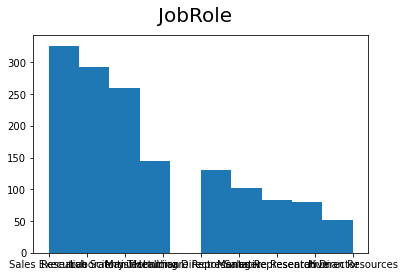

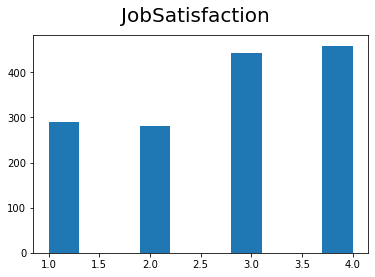

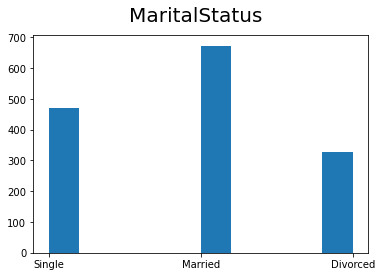

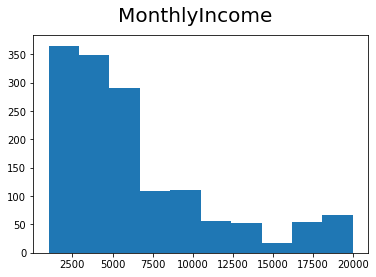

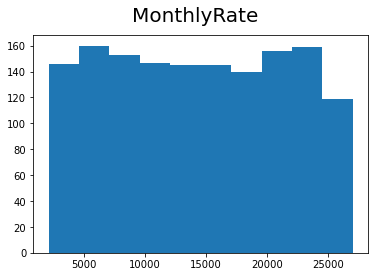

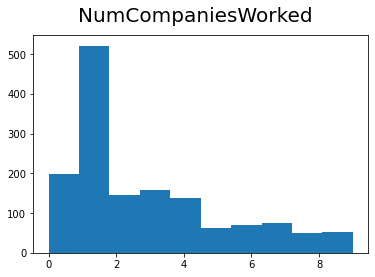

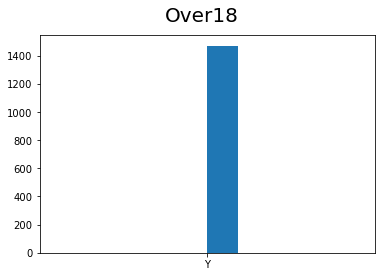

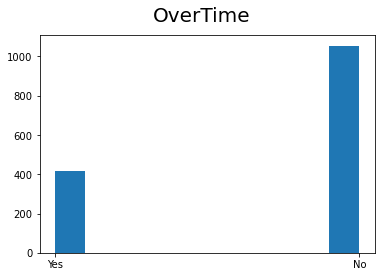

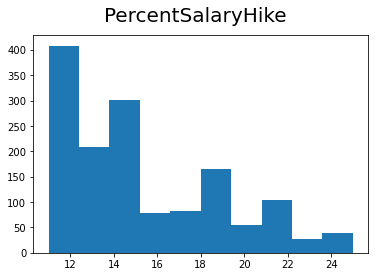

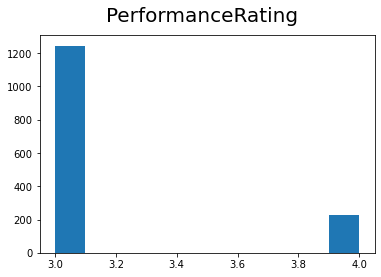

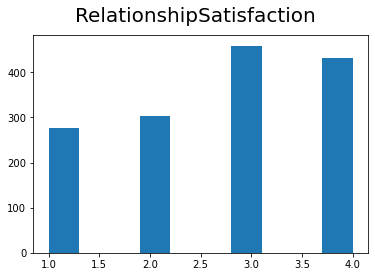

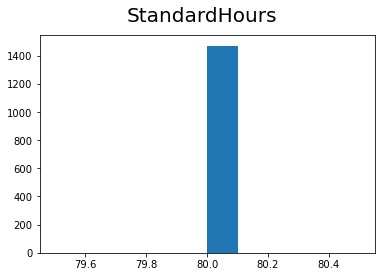

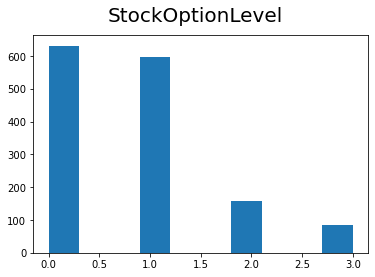

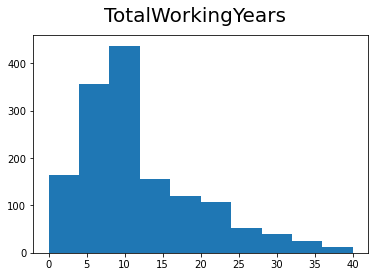

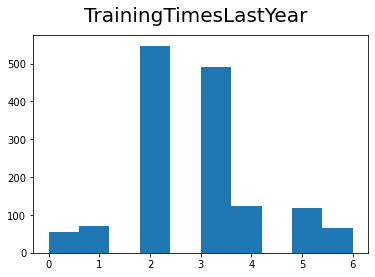

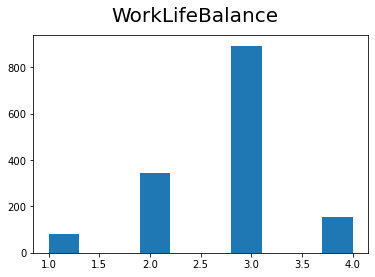

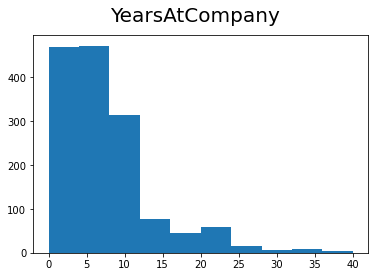

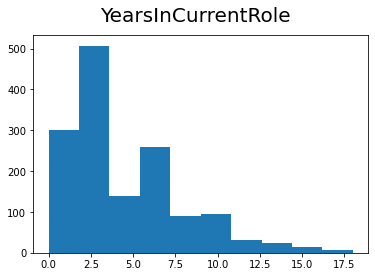

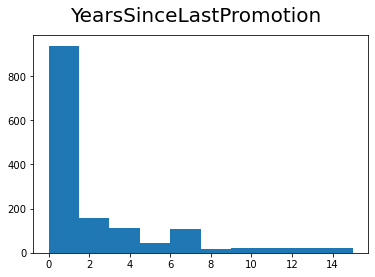

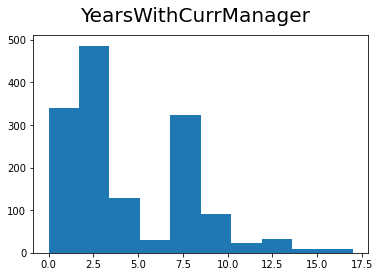

In [194]:
import matplotlib.pyplot as plt
for i in info2.columns:
    plt.figure()
    plt.hist(info2[i])
    plt.suptitle(i, fontsize=20)


In [216]:
import statsmodels.api as sm
data = info2[['JobRole','Attrition']]
print(sm.stats.Table.from_data(data).table_orig)
data = info2[['OverTime','Attrition']]
print(sm.stats.Table.from_data(data).table_orig)
data = info2[['JobLevel','Attrition']]
print(sm.stats.Table.from_data(data).table_orig)
data = info2[['EnvironmentSatisfaction','Attrition']]
print(sm.stats.Table.from_data(data).table_orig)
data = info2[['JobInvolvement','Attrition']]
print(sm.stats.Table.from_data(data).table_orig)

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127
Attrition   No  Yes
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5
Attrition                 No  Yes
EnvironmentSatisfaction          
1                        212   72
2                        244   43
3                        391   62
4                        386   60
Attrition        No  Yes
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13


143/443

In [207]:
150/882

0.17006802721088435